In [1]:
from sklearn.cluster import KMeans, DBSCAN
import itertools
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, \
    homogeneity_completeness_v_measure, silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline 
sns.set(style="ticks")

In [2]:
cluster_n_samples = 2000

dataset_name = 'blobs'


def generate_dataset(n_samples):
    """
    Генерация набора данных на 2000 точек
    """
    blobs, blobs_y = make_blobs(n_samples=n_samples, random_state=8)
    
    # Нормализуем признаки
    blobs = StandardScaler().fit_transform(blobs)
    
    return blobs, blobs_y

In [3]:
cluster_datasets, cluster_true_y = generate_dataset(cluster_n_samples)

In [4]:
cluster_datasets.shape

(2000, 2)

In [5]:
cluster_datasets

array([[-1.22134853, -1.1893355 ],
       [-1.37616752, -1.2650585 ],
       [ 0.7494211 , -0.09576493],
       ...,
       [-1.4970798 , -1.14367896],
       [-1.34327793, -1.08771283],
       [ 0.30236787,  0.09869919]])

In [6]:
def visualize_clusters(cluster_datasets, cluster_result):
    """
    Визуализация результатов кластерного анализа
    """
    plt.subplots(figsize=(10,7))
    plot_num = 0
    plot_num += 1
    plt.subplot(2, 3, plot_num)
    # Цвета точек как результат кластеризации
    colors = pd.np.array(list(itertools.islice(itertools.cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(cluster_result) + 1))))
    # черный цвет для выделяющихся значений
    colors = pd.np.append(colors, ["#000000"])
    plt.scatter(cluster_datasets[:, 0], cluster_datasets[:, 1], s=3, color=colors[cluster_result])
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plt.title(dataset_name)
    
    plt.show()

In [7]:
cluster_results_empty = pd.np.zeros(cluster_n_samples, dtype=int)

c:\django_projects\untitled\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


c:\django_projects\untitled\venv\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  # Remove the CWD from sys.path while we load stuff.
c:\django_projects\untitled\venv\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from ipykernel import kernelapp as app


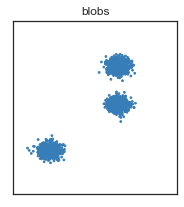

In [8]:
# Нет кластеров
visualize_clusters(cluster_datasets, cluster_results_empty)

In [9]:
def do_clustering(cluster_datasets, method):
    """
    Выполнение кластеризации для данных примера
    """
    cluster_result = method.fit_predict(cluster_datasets)
    return cluster_result

In [10]:
result_KMeans_3 = do_clustering(cluster_datasets, KMeans(n_clusters=3))


c:\django_projects\untitled\venv\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  # Remove the CWD from sys.path while we load stuff.
c:\django_projects\untitled\venv\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from ipykernel import kernelapp as app


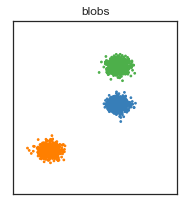

In [11]:
visualize_clusters(cluster_datasets, result_KMeans_3)

c:\django_projects\untitled\venv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """
c:\django_projects\untitled\venv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """
c:\django_projects\untitled\venv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """
c:\django_projects\untitled\venv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """
c:\django_projects\untitled\venv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be re

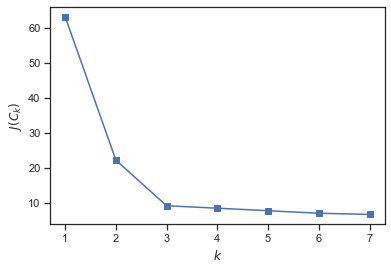

In [12]:
inertia = []
TEMP_X = cluster_datasets
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(TEMP_X)
    inertia.append(pd.np.sqrt(kmeans.inertia_))
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def claster_metrics(method, cluster_datasets, cluster_true_y, datasets_names):
    """
    Вычисление метрик кластеризации
    """
    temp_cluster = method.fit_predict(cluster_datasets)
    ari = adjusted_rand_score(cluster_true_y, temp_cluster)
    ami = adjusted_mutual_info_score(cluster_true_y, temp_cluster)
    
    h, c, v = homogeneity_completeness_v_measure(cluster_true_y, temp_cluster)
    hl = h 
    vl = v
    cl = c
    
    sl = silhouette_score(cluster_datasets, temp_cluster)
    
    result = pd.DataFrame([{'Datasets':datasets_names, 
                           'ARI':ari, 'AMI':ami, 
                           'Homogeneity':hl, 
                           'Completeness':cl, 
                           'V-measure':vl, 'Silhouette':sl}])
    return result

In [14]:
# Вычисление метрик для KMeans
claster_metrics(KMeans(n_clusters=3), cluster_datasets, cluster_true_y, dataset_name)
    

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,blobs,1.0,1.0,1.0,1.0,1.0,0.811512


In [15]:
result_DBSCAN = do_clustering(cluster_datasets, DBSCAN(eps=0.25))


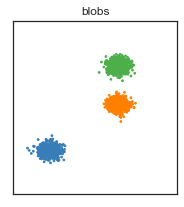

In [16]:
visualize_clusters(cluster_datasets, result_DBSCAN)

In [17]:
claster_metrics(DBSCAN(eps=0.25), cluster_datasets, cluster_true_y, dataset_name)


,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,blobs,1.0,1.0,1.0,1.0,1.0,0.811512
